### Используя сверточные слои и архитектуру получите на fashion mnist качество не ниже 89,5%

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import torch
import numpy as np
import torchvision as tv
import pandas as pd
from sklearn.metrics import confusion_matrix
from torch import nn
import time

In [2]:
BATCH_SIZE=256

In [3]:
train_dataset = tv.datasets.FashionMNIST('.', train=True, transform=tv.transforms.ToTensor(), download=True)
test_dataset = tv.datasets.FashionMNIST('.', train=False, transform=tv.transforms.ToTensor(), download=True)
train_iter = torch.utils.data.DataLoader(train_dataset, batch_size=BATCH_SIZE)
test_iter = torch.utils.data.DataLoader(test_dataset, batch_size=BATCH_SIZE)

In [4]:
train_dataset.classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

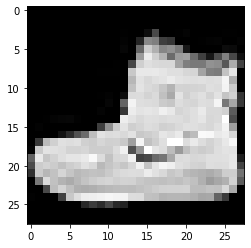

In [6]:
plt.imshow(train_dataset[0][0].numpy().reshape(28,28), cmap='gray');

In [26]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

#### Cuda подключить не удалось, пока разбираюсь...

In [27]:
model = model.to(device)

In [90]:
model = nn.Sequential(
    nn.Conv2d(1, 12, kernel_size=3, padding=1),
    nn.BatchNorm2d(12),
    nn.ReLU(),
    nn.MaxPool2d(2, stride=2),
    nn.Conv2d(12, 24, kernel_size=3, padding=1),
    nn.BatchNorm2d(24),
    nn.ReLU(),
    nn.MaxPool2d(2),
    nn.Conv2d(24, 64, kernel_size=3, padding=1),
    nn.BatchNorm2d(64),
    nn.ReLU(),
    nn.MaxPool2d(2, stride=2),
    nn.Flatten(),
    nn.Linear(576, 1024),
    nn.BatchNorm1d(1024),
    nn.ReLU(),
    nn.Linear(1024, 254),
    nn.ReLU(),
    nn.Linear(254, 10)
)

In [91]:
from torchsummary import summary

summary(model, input_size=(1, 28, 28), device='cpu')

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 12, 28, 28]             120
       BatchNorm2d-2           [-1, 12, 28, 28]              24
              ReLU-3           [-1, 12, 28, 28]               0
         MaxPool2d-4           [-1, 12, 14, 14]               0
            Conv2d-5           [-1, 24, 14, 14]           2,616
       BatchNorm2d-6           [-1, 24, 14, 14]              48
              ReLU-7           [-1, 24, 14, 14]               0
         MaxPool2d-8             [-1, 24, 7, 7]               0
            Conv2d-9             [-1, 64, 7, 7]          13,888
      BatchNorm2d-10             [-1, 64, 7, 7]             128
             ReLU-11             [-1, 64, 7, 7]               0
        MaxPool2d-12             [-1, 64, 3, 3]               0
          Flatten-13                  [-1, 576]               0
           Linear-14                 [-

In [28]:
def evaluate_accuracy(data_iter, net, device):
    acc_sum, n = torch.Tensor([0]).to(device), 0
    for X, y in data_iter:
        X, y = X.to(device), y.to(device)
        acc_sum += (net(X).argmax(axis=1) == y).sum()
        n += y.shape[0]
    return acc_sum.item() / n

In [29]:
def train(net, train_iter, test_iter, optimizer, num_epochs, device):
    loss = nn.CrossEntropyLoss()

    for epoch in range(num_epochs):
        train_l_sum, train_acc_sum, n, start = 0.0, 0.0, 0, time.time()
    
        for X, y in train_iter:
            X, y = X.to(device), y.to(device)
            optimizer.zero_grad()
            y_hat = net(X)
            l = loss(y_hat, y)
            l.backward()
            optimizer.step()
            train_l_sum += l.item()
            train_acc_sum += (y_hat.argmax(axis=1) == y).sum().item()
            n += y.shape[0]
    
        test_acc = evaluate_accuracy(test_iter, net, device)
        print(f'epoch {epoch + 1}, loss {train_l_sum / n:.4f}, train acc {train_acc_sum / n:.3f}' \
              f', test acc {test_acc:.3f}, time {time.time() - start:.1f} sec')

In [92]:
lr, num_epochs = 0.01, 5
trainer = torch.optim.Adam(model.parameters(), lr=lr)
train(model, train_iter, test_iter, trainer, num_epochs, device)

epoch 1, loss 0.0018, train acc 0.840, test acc 0.872, time 34.9 sec
epoch 2, loss 0.0011, train acc 0.900, test acc 0.891, time 32.9 sec
epoch 3, loss 0.0009, train acc 0.914, test acc 0.903, time 34.0 sec
epoch 4, loss 0.0008, train acc 0.925, test acc 0.898, time 34.1 sec
epoch 5, loss 0.0007, train acc 0.931, test acc 0.907, time 34.0 sec


#### Качество 90,7%